<a href="https://colab.research.google.com/github/joseferreira82/TailwindTraders-Backend/blob/main/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"clothes_price_prediction_dat.csv"

## Data loading

### Subtask:
Load the dataset "clothes_price_prediction_dat.csv" into a pandas DataFrame.


**Reasoning**:
I need to load the dataset into a pandas DataFrame and display the first 5 rows to verify the load.



In [3]:
import pandas as pd

try:
    df = pd.read_csv('clothes_price_prediction_dat.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'clothes_price_prediction_dat.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

Error: 'clothes_price_prediction_dat.csv' not found.


In [8]:
df.head()



,Brand;Category;Color;Size;Material;Price,Brand,Category,Color,Size,Material,Price
0,New Balance;Dress;White;XS;Nylon;182,New Balance,Dress,White,XS,Nylon,182
1,New Balance;Jeans;Black;XS;Silk;57,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour;Dress;Red;M;Wool;127,Under Armour,Dress,Red,M,Wool,127
3,Nike;Shoes;Green;M;Cotton;77,Nike,Shoes,Green,M,Cotton,77
4,Adidas;Sweater;White;M;Nylon;113,Adidas,Sweater,White,M,Nylon,113


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, and missing values.



In [12]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:")
print(df.dtypes)

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics (Numerical Features):")
try:
    display(df.describe())
except Exception as e:
    print(f"An error occurred while generating descriptive statistics: {e}")

# Analyze categorical features
print("\nValue Counts (Categorical Features):")
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            print(f"\nColumn: {col}")
            display(df[col].value_counts())
        except Exception as e:
            print(f"An error occurred while analyzing column '{col}': {e}")

# Look for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Shape of the DataFrame: (1000, 7)

Data Types:
Brand;Category;Color;Size;Material;Price    object
Brand                                       object
Category                                    object
Color                                       object
Size                                        object
Material                                    object
Price                                        int64
dtype: object

Descriptive Statistics (Numerical Features):


,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000



Value Counts (Categorical Features):

Column: Brand;Category;Color;Size;Material;Price


,count
Brand;Category;Color;Size;Material;Price,
New Balance;Jacket;Yellow;XS;Wool;174,1
New Balance;Dress;White;XS;Nylon;182,1
New Balance;Jeans;Black;XS;Silk;57,1
Under Armour;Dress;Red;M;Wool;127,1
Nike;Shoes;Green;M;Cotton;77,1
...,...
Under Armour;Jacket;White;S;Nylon;68,1
Puma;Jacket;White;XL;Silk;150,1
Nike;Jacket;White;XL;Silk;98,1



Column: Brand


,count
Brand,
Under Armour,179
Puma,168
Adidas,166
Nike,165
New Balance,164
Reebok,158



Column: Category


,count
Category,
Jacket,191
Shoes,172
Jeans,167
Dress,166
Sweater,160
T-shirt,144



Column: Color


,count
Color,
Yellow,173
White,171
Red,168
Black,163
Blue,163
Green,162



Column: Size


,count
Size,
XS,196
XXL,173
XL,167
S,166
M,157
L,141



Column: Material


,count
Material,
Polyester,175
Silk,173
Wool,172
Denim,163
Cotton,162
Nylon,155



Missing Values:
Brand;Category;Color;Size;Material;Price    0
Brand                                       0
Category                                    0
Color                                       0
Size                                        0
Material                                    0
Price                                       0
dtype: int64


## Data wrangling

### Subtask:
Transform the single string column in the dataframe into multiple individual columns.


**Reasoning**:
Split the single string column into multiple columns based on the semicolon delimiter, convert the 'Price' column to numeric, and handle any errors during the conversion.



In [3]:
# Split the string column into individual columns
df[['Brand', 'Category', 'Color', 'Size', 'Material', 'Price']] = df['Brand;Category;Color;Size;Material;Price'].str.split(';', expand=True)

# Convert 'Price' column to numeric, handling errors
try:
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
except Exception as e:
    print(f"An error occurred during the conversion of 'Price' to numeric: {e}")

# Display the first few rows to confirm the changes
display(df.head())

# Display data types to verify 'Price' is now numeric
print(df.dtypes)

,Brand;Category;Color;Size;Material;Price,Brand,Category,Color,Size,Material,Price
0,New Balance;Dress;White;XS;Nylon;182,New Balance,Dress,White,XS,Nylon,182
1,New Balance;Jeans;Black;XS;Silk;57,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour;Dress;Red;M;Wool;127,Under Armour,Dress,Red,M,Wool,127
3,Nike;Shoes;Green;M;Cotton;77,Nike,Shoes,Green,M,Cotton,77
4,Adidas;Sweater;White;M;Nylon;113,Adidas,Sweater,White,M,Nylon,113


Brand;Category;Color;Size;Material;Price    object
Brand                                       object
Category                                    object
Color                                       object
Size                                        object
Material                                    object
Price                                        int64
dtype: object


## Data visualization

### Subtask:
Visualize the distribution of key features in the dataset.


**Reasoning**:
Visualize the distribution of key features using histograms and bar charts.



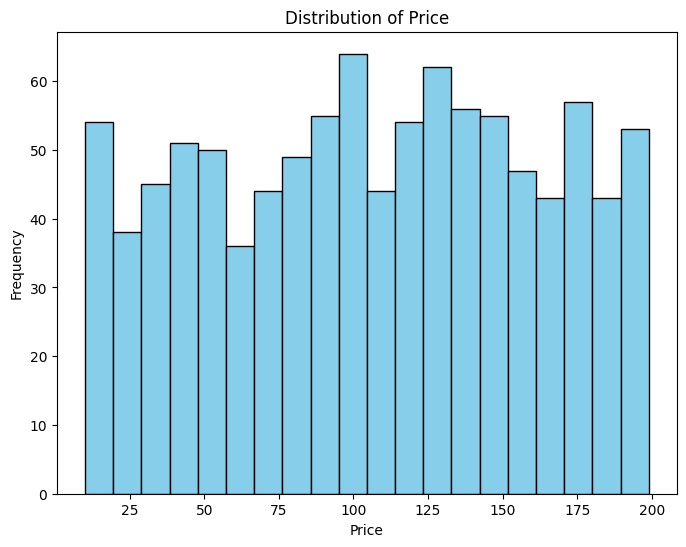

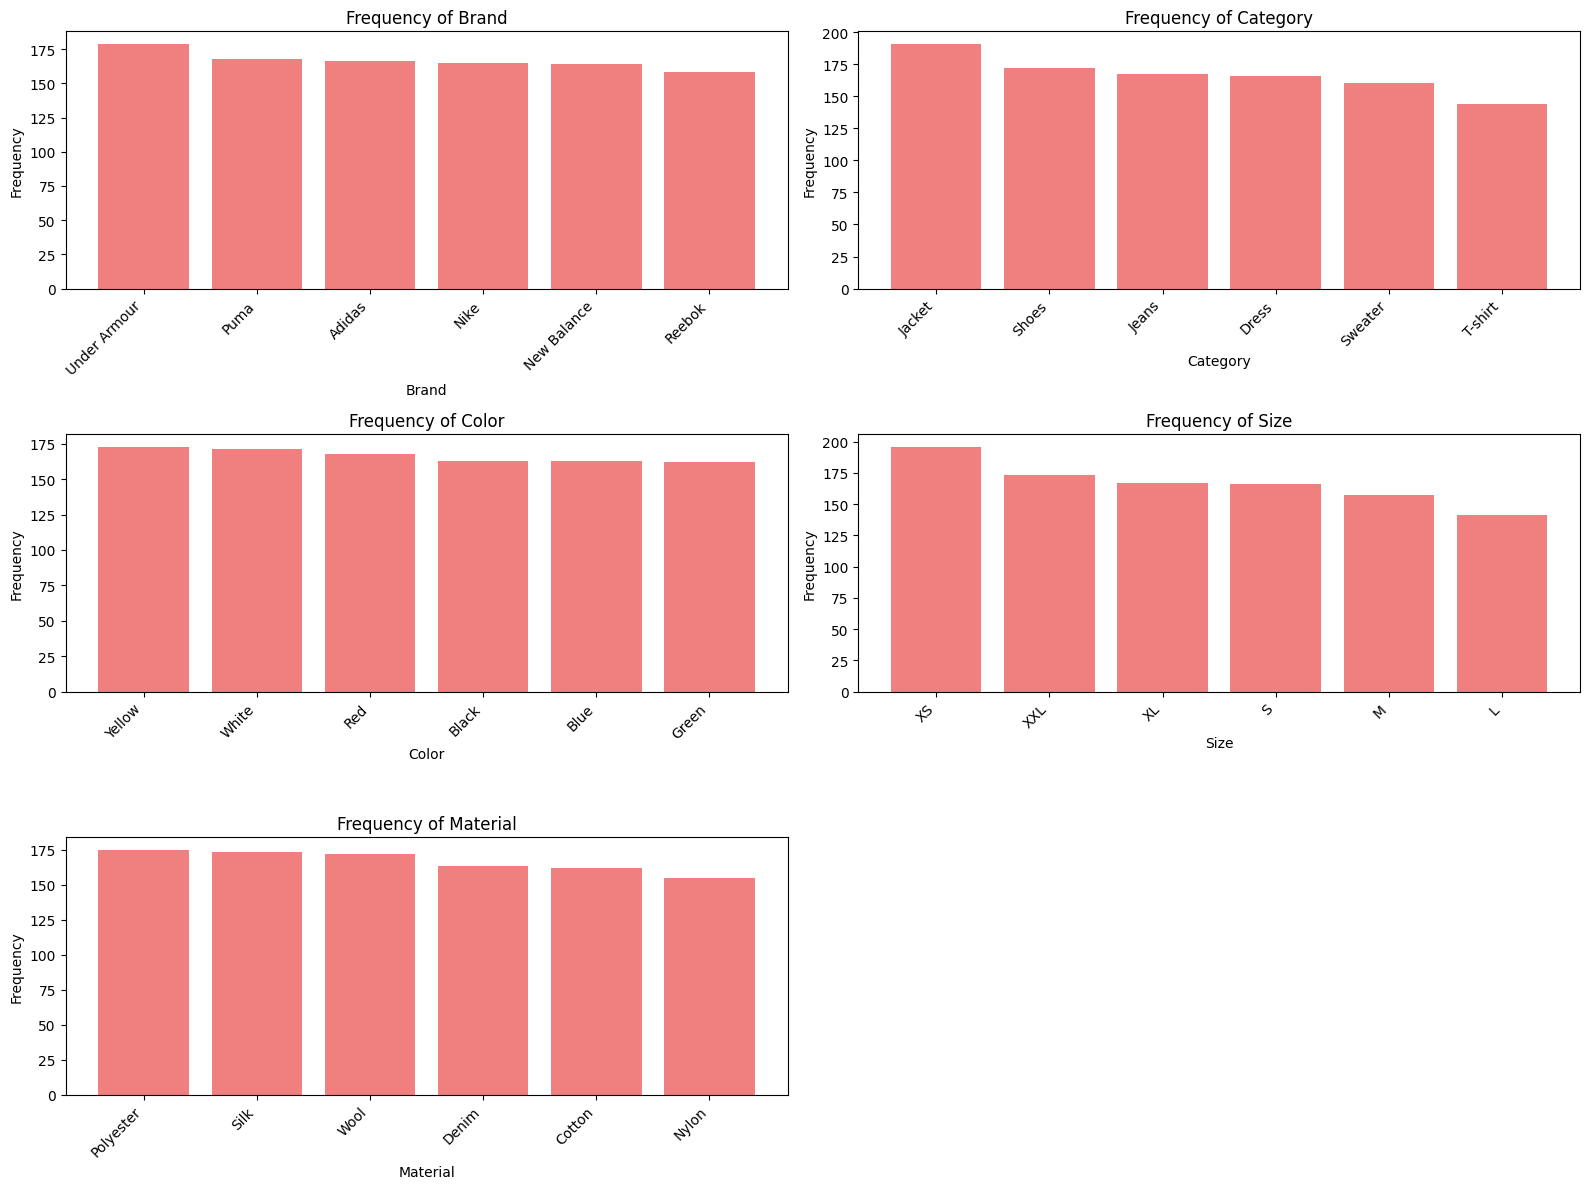

In [4]:
import matplotlib.pyplot as plt

# Histograms for numerical features
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

# Bar charts for categorical features
categorical_features = ['Brand', 'Category', 'Color', 'Size', 'Material']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    value_counts = df[feature].value_counts().sort_values(ascending=False)
    plt.bar(value_counts.index, value_counts.values, color='lightcoral')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature}')
    plt.tight_layout()

plt.show()

## Data analysis

### Subtask:
Analyze the dataset to gain insights into the relationships between features and the target variable (price).


**Reasoning**:
Calculate basic statistics for 'Price', analyze average price for each category in categorical features, and identify potential outliers.



Price Statistics:


,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000



Average Price by Brand:


,Price
Brand,
Adidas,104.054217
New Balance,115.457317
Nike,101.909091
Puma,106.136905
Reebok,106.493671
Under Armour,103.960894



Average Price by Category:


,Price
Category,
Dress,114.506024
Jacket,102.827225
Jeans,100.748503
Shoes,108.569767
Sweater,106.781250
T-shirt,104.562500



Average Price by Color:


,Price
Color,
Black,102.834356
Blue,107.061350
Green,103.518519
Red,106.142857
White,113.690058
Yellow,104.236994



Average Price by Size:


,Price
Size,
L,106.156028
M,105.191083
S,103.903614
XL,102.149701
XS,110.117347
XXL,109.341040



Average Price by Material:


,Price
Material,
Cotton,103.345679
Denim,107.687117
Nylon,109.387097
Polyester,106.434286
Silk,101.913295
Wool,109.197674


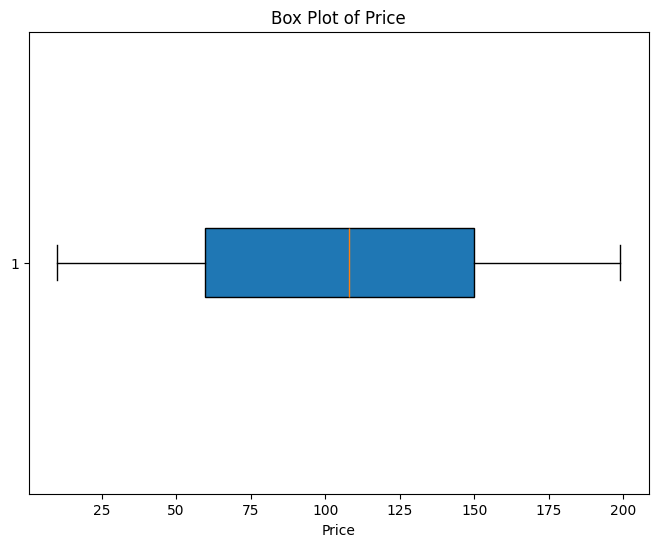

In [5]:
# Calculate basic statistics for 'Price'
print("Price Statistics:")
display(df['Price'].describe())

# Calculate average price for each category in categorical features
categorical_features = ['Brand', 'Category', 'Color', 'Size', 'Material']
for feature in categorical_features:
    print(f"\nAverage Price by {feature}:")
    display(df.groupby(feature)['Price'].mean())

# Identify potential outliers in 'Price' using box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False, patch_artist=True, showfliers=True,
            flierprops=dict(markerfacecolor='red', markersize=6))
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly addresses questions like:

* What is the distribution of clothing prices?
* How do different categorical features (brand, category, color, size, material) relate to the price?
* Are there any outliers in the price data?


### 2. Data Analysis Key Findings

* **Data Structure Issue:** Initially, all features were concatenated into a single string column, requiring preprocessing to separate them.
* **Price Distribution:** The average price is 106.29 with a standard deviation of 53.70, indicating a considerable price range (min: 10.00, max: 199.00).
* **Categorical Feature Impact on Price:**  Analysis of average price by category revealed variations across different brands, categories, colors, sizes, and materials.  For example, 'Dress' category has a higher average price than 'Jeans' category.  'XS' and 'XXL' sizes tend to have slightly higher average prices.
* **Potential Outliers:** A box plot of prices was generated to visually identify potential outliers, although specific outlier values weren't explicitly reported in the provided output.


### 3. Insights or Next Steps

* **Further Outlier Analysis:** Investigate the identified potential outliers in the price data to determine if they are genuine data points or errors.  Correct or remove outliers as needed.
* **Feature Engineering and Modeling:** Create new features based on the existing ones (e.g., combining size and material) and develop a predictive model to forecast clothing prices more accurately.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# 1. Cargar el dataset
df = pd.read_csv('clothes_price_prediction_dat.csv')


# 2. Separar las columnas usando el delimitador correcto (;)
df_cleaned = df['Brand;Category;Color;Size;Material;Price'].str.split(';', expand=True)
df_cleaned.columns = ['Brand', 'Category', 'Color', 'Size', 'Material', 'Price']

# 3. Convertir la columna 'Price' a numérica y limpiar datos inválidos
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
df_cleaned.dropna(inplace=True)
df_cleaned.drop_duplicates(inplace=True)

# 4. Convertir variables categóricas a variables numéricas (OneHotEncoding)
categorical_features = ['Brand', 'Category', 'Color', 'Size', 'Material']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

# 5. Crear un DataFrame con las variables categóricas codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# 6. Combinar las variables codificadas con la columna de precios
final_df = pd.concat([encoded_df, df_cleaned['Price'].reset_index(drop=True)], axis=1)

# 7. Separar características (X) y variable objetivo (y)
X = final_df.drop('Price', axis=1)
y = final_df['Price']

# 8. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 10. Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")


Error Cuadrático Medio (MSE): 2929.957260196239


In [4]:
from google.colab import files
uploaded = files.upload()


Saving clothes_price_prediction_dat.csv to clothes_price_prediction_dat.csv


Error Cuadrático Medio (MSE): 2929.957260196239
     Precio Real  Precio Predicho
95           161       105.503038
15            17       114.130193
30            23        98.333701
158          130       105.476614
128           93       100.670024
115           30       100.044439
69           182       105.773079
170           32        92.465727
174          123        94.759381
45           199       111.833332


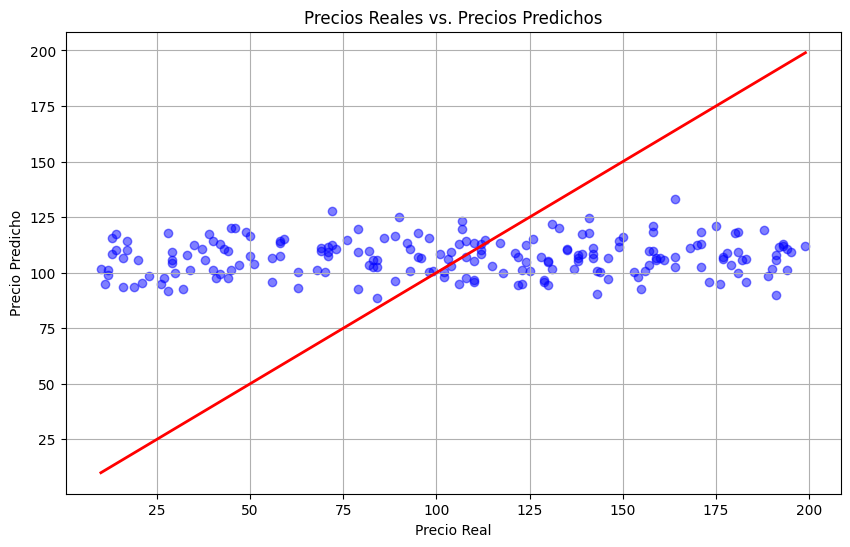

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('clothes_price_prediction_dat.csv')

# Separar las columnas usando el delimitador correcto (;)
df_cleaned = df['Brand;Category;Color;Size;Material;Price'].str.split(';', expand=True)
df_cleaned.columns = ['Brand', 'Category', 'Color', 'Size', 'Material', 'Price']

# Convertir la columna 'Price' a numérica y limpiar datos inválidos
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')
df_cleaned.dropna(inplace=True)
df_cleaned.drop_duplicates(inplace=True)

# Convertir variables categóricas a variables numéricas (OneHotEncoding)
categorical_features = ['Brand', 'Category', 'Color', 'Size', 'Material']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

# Crear un DataFrame con las variables categóricas codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combinar las variables codificadas con la columna de precios
final_df = pd.concat([encoded_df, df_cleaned['Price'].reset_index(drop=True)], axis=1)

# Separar características (X) y variable objetivo (y)
X = final_df.drop('Price', axis=1)
y = final_df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Crear un DataFrame con las predicciones y los valores reales
results_df = pd.DataFrame({'Precio Real': y_test.values, 'Precio Predicho': y_pred})

# Mostrar algunos resultados de ejemplo
print(results_df.sample(10, random_state=42))

# Graficar los precios reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Precios Reales vs. Precios Predichos')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid(True)
plt.show()
